In [30]:
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline
graphics = 'figures/' # The path we pre-pend to the figures.

[ 0.82962057  0.73303556  0.5768609   0.103711    0.14603167  0.1916816 ]


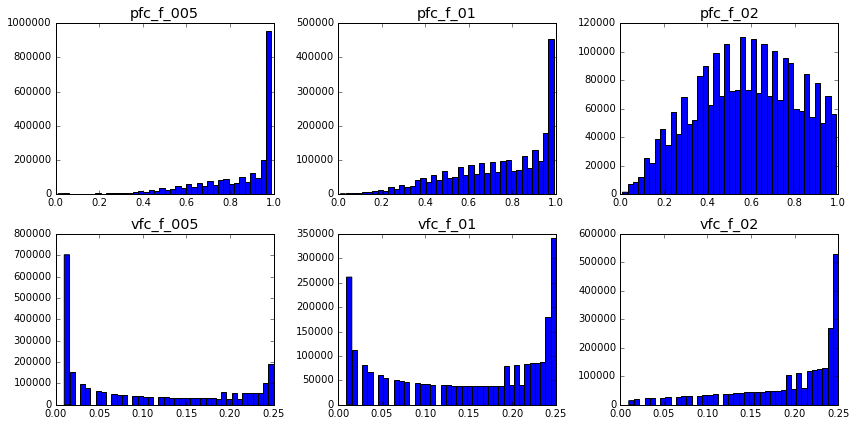

In [31]:
# Let's load the data into directory_data. There should be 2,521,800 data points.
directory_names = ['pfc_f_005', 'pfc_f_01', 'pfc_f_02', 'vfc_f_005', 'vfc_f_01', 'vfc_f_02']
directory_data = []

for directory in directory_names:
    data = np.array([])
    for data_file_name in os.listdir(directory):
        this_data = np.load(directory + "/" + data_file_name)['arr_0']
        data = np.concatenate((data,this_data))
    directory_data.append(data)
    
# Now let's do a plot of them together.
f, axarr = plt.subplots(2,3, figsize=(12, 6))

axarr[0,0].hist(directory_data[0], bins=40)
axarr[0,0].set_title(directory_names[0], size='x-large')

axarr[0,1].hist(directory_data[1], bins=40)
axarr[0,1].set_title(directory_names[1], size='x-large')

axarr[0,2].hist(directory_data[2], bins=40)
axarr[0,2].set_title(directory_names[2], size='x-large')

axarr[1,0].hist(directory_data[3], bins=40)
axarr[1,0].set_title(directory_names[3], size='x-large')

axarr[1,1].hist(directory_data[4], bins=40)
axarr[1,1].set_title(directory_names[4], size='x-large')

axarr[1,2].hist(directory_data[5], bins=40)
axarr[1,2].set_title(directory_names[5], size='x-large')

plt.tight_layout()
plt.savefig(graphics + 'fig_new_histograms_pfc_vfc.png',dpi=250)
print(np.mean(directory_data,axis=1))

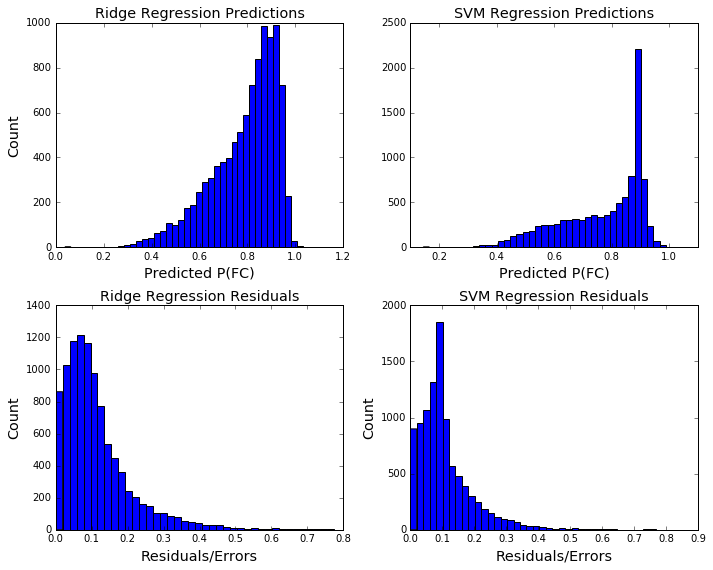

In [32]:
### VARIOUS HISTOGRAMS OF PREDICTIONS AND PREDICTION ERRORS
# (Be careful that I'm getting file names correct here ... I don't have everything automated.)
# And I still need to figure out how to get the data from neural networks.

# The true output (the name is misleading, the y_vals don't depend on the algorithm but w/e)
output = 'results/'
yval_ridge = np.load(output + 'y_val_ridge.npy')
yval_svm = np.load(output + 'y_val_svm.npy')

# The predicted output by our two algorithms
pred_ridge = np.load(output + 'ridge_preds.npy')
pred_svm = np.load(output + 'svm_preds.npy')

# The differences
diff_ridge = np.absolute(yval_ridge - pred_ridge)
diff_svm = np.absolute(yval_svm - pred_svm)

# Finally, the subplot
f, axarr = plt.subplots(2,2, figsize=(10, 8))
axarr[0,0].hist(pred_ridge, bins=40)
axarr[0,0].set_title('Ridge Regression Predictions', size='x-large')
axarr[0,0].set_xlabel('Predicted P(FC)', size='x-large')
axarr[0,0].set_ylabel('Count', size='x-large')
axarr[0,1].hist(pred_svm, bins=40)
axarr[0,1].set_title('SVM Regression Predictions', size='x-large')
axarr[0,1].set_xlabel('Predicted P(FC)', size='x-large')
axarr[0,0].set_ylabel('Count', size='x-large')

axarr[1,0].hist(diff_ridge, bins=40)
axarr[1,0].set_title('Ridge Regression Residuals', size='x-large')
axarr[1,0].set_xlabel('Residuals/Errors', size='x-large')
axarr[1,0].set_ylabel('Count', size='x-large')
axarr[1,1].hist(diff_svm, bins=40)
axarr[1,1].set_title('SVM Regression Residuals', size='x-large')
axarr[1,1].set_xlabel('Residuals/Errors', size='x-large')
axarr[1,1].set_ylabel('Count', size='x-large')

plt.tight_layout()
plt.savefig(graphics + 'fig_predictions_and_errors.png', dpi=200)

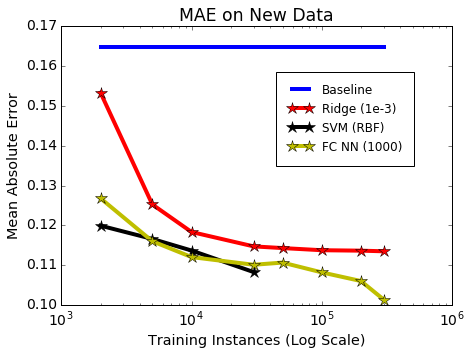

In [33]:
# OK, now let's get back to the 'normal' plots that I've been doing
# The ones that plot MAE vs training set sizes for the different algorithms.

# Note that the ridge was with alpha = 0.001.
# Also, the NN had one hidden layer with 1000 units, w/tanh nonlinearity, and LR = 0.01.
ridge = [0.15332, 0.12527, 0.11836, 0.11475, 0.11433, 0.11379, 0.11368, 0.11352]
svm =   [0.11995, 0.11662, 0.11371, 0.10831]
nn =    [0.12682, 0.11604, 0.11207, 0.11014, 0.11069, 0.10823, 0.10606, 0.10138]
training_sizes = [2000, 5000, 10000, 30000, 50000, 100000, 200000, 300000]
mean = np.ones(8)*0.16488

plt.figure(figsize=(7,5))
plt.title('MAE on New Data', size='xx-large')
plt.xlabel('Training Instances (Log Scale)', size='x-large')
plt.ylabel('Mean Absolute Error', size='x-large')
plt.xscale('log')
plt.tick_params(axis='both', which='major', labelsize=14)

plt.plot(training_sizes, mean, linewidth=4, label='Baseline')
plt.plot(training_sizes[:len(ridge)], ridge, 'r*-', markersize=12, linewidth=4, label='Ridge (1e-3)')
plt.plot(training_sizes[:len(svm)], svm, 'k*-', markersize=12, linewidth=4, label='SVM (RBF)')
plt.plot(training_sizes[:len(nn)], nn, 'y*-', markersize=12, linewidth=4, label='FC NN (1000)')

plt.legend(loc=(0.55,0.5), scatterpoints=1, borderpad=1)
plt.savefig(graphics + 'fig_new_data_mae.png',dpi=200)

## TODO I need another plot here with neural network parameter comparisons (ideally)

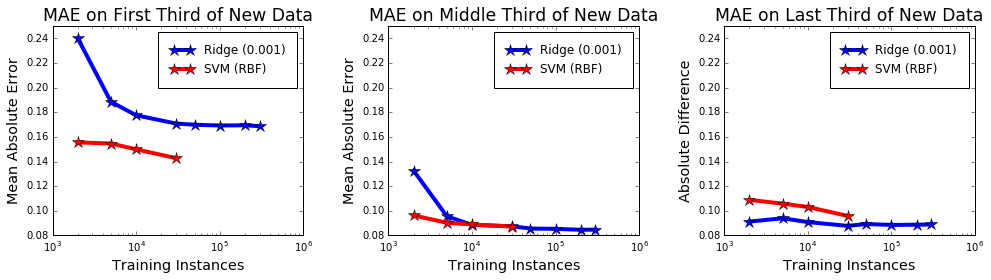

In [51]:
## Let's try analyzing the "performance by thirds". Instead of what I did before, use subplots.

f, axarr = plt.subplots(1,3, figsize=(14, 4))
training_sizes = [2000, 5000, 10000, 30000, 50000, 100000, 200000, 300000]

# First third
rid_first = [0.24000, 0.18841, 0.17753, 0.17083, 0.16983, 0.16923, 0.16942, 0.16865]
svm_first = [0.15557, 0.15459, 0.14989, 0.14276]
axarr[0].set_title('MAE on First Third of New Data', size='xx-large')
axarr[0].set_xlabel('Training Instances', size='x-large')
axarr[0].set_ylabel('Mean Absolute Error', size='x-large')
axarr[0].set_xscale('log')
axarr[0].set_ylim([0.08,0.25])
axarr[0].plot(training_sizes[:len(rid_first)], rid_first, 'b*-', markersize=12, linewidth=4, label='Ridge (0.001)')
axarr[0].plot(training_sizes[:len(svm_first)], svm_first, 'r*-', markersize=12, linewidth=4, label='SVM (RBF)')
axarr[0].legend(loc='upper right', borderpad=1, scatterpoints=1, ncol=1)

# Middle third
rid_second = [0.13257, 0.09560, 0.08859, 0.08746, 0.08562, 0.08536, 0.08462, 0.08472]
svm_second = [0.09629, 0.09030, 0.08897, 0.08725]
axarr[1].set_title('MAE on Middle Third of New Data', size='xx-large')
axarr[1].set_xlabel('Training Instances', size='x-large')
axarr[1].set_ylabel('Mean Absolute Error', size='x-large')
axarr[1].set_xscale('log')
axarr[1].set_ylim([0.08,0.25])
axarr[1].plot(training_sizes[:len(rid_first)], rid_second, 'b*-', markersize=12, linewidth=4, label='Ridge (0.001)')
axarr[1].plot(training_sizes[:len(svm_first)], svm_second, 'r*-', markersize=12, linewidth=4, label='SVM (RBF)')
axarr[1].legend(loc='upper right', borderpad=1, scatterpoints=1, ncol=1)

# Last Third
rid_third = [0.09128, 0.09394, 0.09087, 0.08780, 0.08930, 0.08854, 0.08874, 0.08891]
svm_third = [0.10885, 0.10587, 0.10311, 0.09585]
axarr[2].set_title('MAE on Last Third of New Data', size='xx-large')
axarr[2].set_xlabel('Training Instances', size='x-large')
axarr[2].set_ylabel('Absolute Difference', size='x-large')
axarr[2].set_xscale('log')
axarr[2].set_ylim([0.08,0.25])
axarr[2].plot(training_sizes[:len(rid_first)], rid_third, 'b*-', markersize=12, linewidth=4, label='Ridge (0.001)')
axarr[2].plot(training_sizes[:len(svm_first)], svm_third, 'r*-', markersize=12, linewidth=4, label='SVM (RBF)')
axarr[2].legend(loc='upper right', borderpad=1, scatterpoints=1, ncol=1)

plt.tight_layout()
plt.savefig(graphics + 'fig_new_data_thirds.png', dpi=150)
